In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.utils.data as data
import torchvision as tv
import torchvision.transforms as tf
from PIL import Image
%matplotlib inline

# 1. 通用变换 Generic Transform

### 1.1 tf.Lambda

使用一个自定义的lambda或函数作为变换.

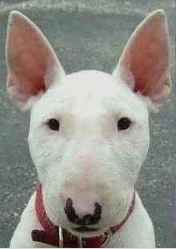

In [3]:
img=Image.open('./data/images/dog/L3.png')
img

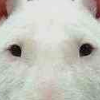

In [4]:
lab=tf.Lambda(lambda x:tf.CenterCrop(size=100)(x))
lab(img)

# 2. 函数变换 Functional Transforms

以下均为函数，不是具备\_\_call\_\_属性的class，直接调用.

torchvision.transforms里面的类，基本上是对Functional Transforms的封装，就像torch.nn里面的类，封装调用了torch.nn.functional一样.

## 2.1 亮度调节 tf.functional.adjust_brightness

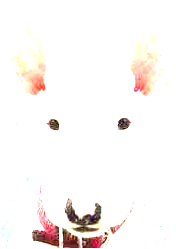

In [9]:
tf.functional.adjust_brightness(img,3)

## 2.2 对比度调节 tf.functional.adjust_contrast

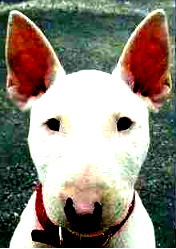

In [10]:
tf.functional.adjust_contrast(img,3)

## 2.3 Gamma调节 tf.functional.adjust_gamma

$ I_{out} = 255 \times gain \times(\frac{I_{in}}{255})^{\gamma}$

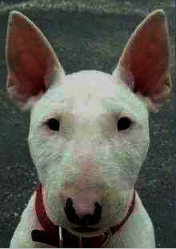

In [11]:
tf.functional.adjust_gamma(img,2)

## 2.4 色调调节 tf.functional.adjust_hue

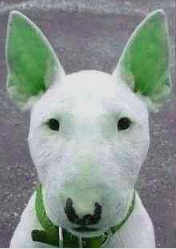

In [13]:
tf.functional.adjust_hue(img,0.3)

## 2.5 饱和度调节 tf.functional.adjust_saturation

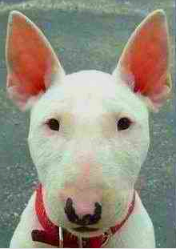

In [14]:
tf.functional.adjust_saturation(img,2)

## 2.6 仿射变换 tf.functional.affine

对图像施加仿射变换且保持中心不变.

## 2.7 图像裁剪 tf.functional.crop

## 2.8 四角加中心裁剪 tf.functional.five_crop

## 2.9 水平反转 tf.functional.hflip

## 2.10 标准化 tf.functional.normalize

## 2.11 填充 tf.functional.pad

## 2.12 缩放 tf.functional.resize

## 2.13 裁剪后缩放 tf.functional.resized_crop

## 2.14 旋转 tf.functional.rotate

## 2.15 正反5次裁剪 tf.functional.ten_crop

## 2.16 对图像灰阶化 tf.functional.to_grayscale

## 2.17 把tensor或ndarray转为PIL tf.functional.to_pil_image

## 2.18 把pil或ndarray转为tensor tf.functional.to_tensor

## 2.19 垂直反转 tf.functional.vflip

# 3 工具库 torchvision.utils

In [26]:
import scipy.misc
##看下scipy中自带的图像
face=scipy.misc.face()
type(face)

numpy.ndarray

In [27]:
face.shape

(768, 1024, 3)

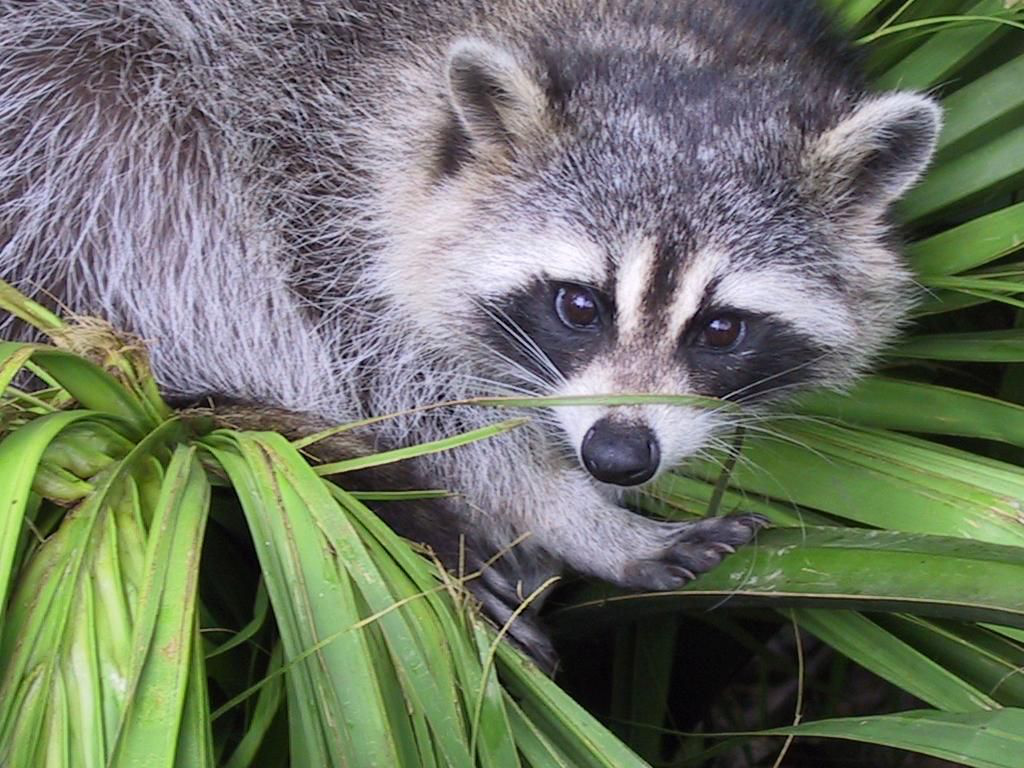

In [28]:
face_img=tf.ToPILImage()(face)
face_img

In [36]:
face_img.size

(1024, 768)

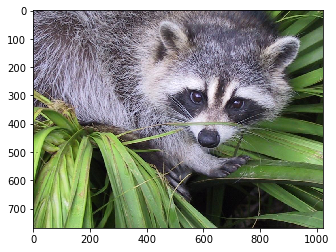

In [29]:
plt.imshow(face);

## 3.1 制作图像网格 make_grid

In [30]:

tensor_img=tf.ToTensor()(img)##这个图片是L3.png，不是上面的face
tensor_img.shape

torch.Size([3, 249, 176])

In [31]:
img_list=[tensor_img,tensor_img,tensor_img]
img_grid=tv.utils.make_grid(img_list,padding=100)
type(img_grid)

torch.Tensor

In [32]:
img_grid.shape

torch.Size([3, 449, 928])

In [35]:
def show_img_grid(img_grid):
    img_np=img_grid.numpy()
    img_np=np.transpose(img_np,(1,2,0))##把CHW转为HWC
    plt.imshow(img_np,interpolation='nearest');

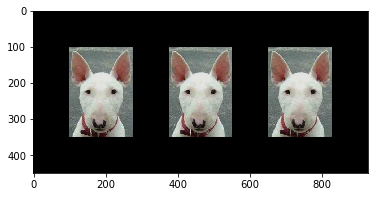

In [37]:
show_img_grid(img_grid)

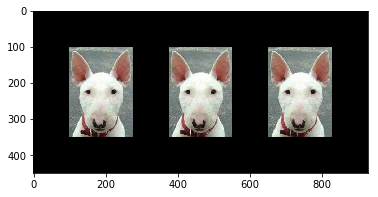

In [38]:
show_img_grid(tv.utils.make_grid(img_list,padding=100,normalize=True))

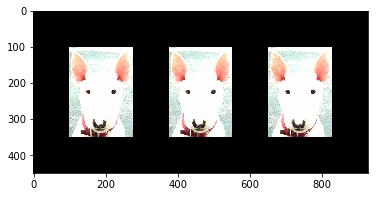

In [40]:
show_img_grid(tv.utils.make_grid(img_list,padding=100,normalize=True,range=(0,0.5)))

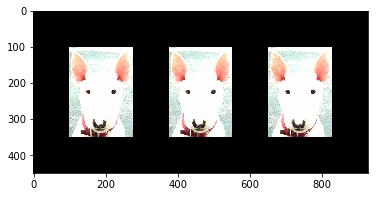

In [41]:
show_img_grid(tv.utils.make_grid(img_list,padding=100,normalize=True,range=(0,0.5),scale_each=True))

## 3.2 把图像tensor数据保存为图像格式 save_image

会根据给定的后缀名，自动保存为相应的图片格式.

In [45]:
tv.utils.save_image(tensor_img,'./data/images/dog/dog_tensor.jpg')